### **If a planets disappered, what would happen?**

- Delta time: 3600 seconds (1 hour)  
- End time: 1555200000 seconds (18000 days)  
- Steps (end time / delta time): 432000  
- Chunk size: 86400

In [36]:
1555200000/3600

432000.0

In [37]:
3600 * 24 * 10

864000

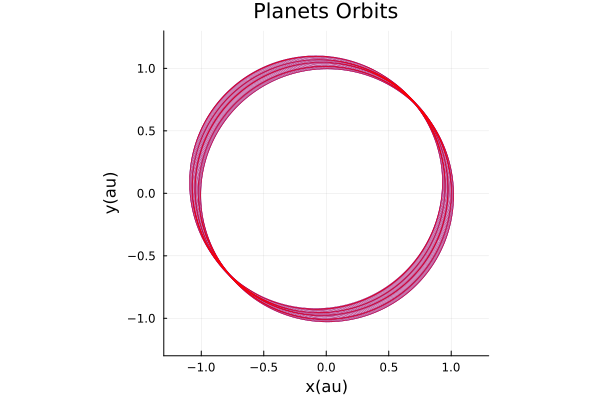

[1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
  0.066748 seconds (37.32 k allocations: 111.261 MiB, 18.74% gc time, 33.15% compilation time)
[1.327038266556391e8, 5.662259959620837e7, -689892.5708040632]


In [38]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG
using JSON
using HDF5

#=
length:km, mass:kg, time:s, angle:rad(deg in json)
(interval must be a multiple of dt, tEnd must be a multiple of interval)
=#

colors = [:orange, :black, :gold, :blue, :brown, :bisque4, :gray, :blue] #惑星の色
AU = 1.495978e8 #AU

function plotWithChunks(file, tEnd, dt, range, title, chunk_size)
    p = scatter([], [], xlims=(-range,range), ylims=(-range,range), title=title, xlabel="x(au)", ylabel="y(au)", aspect_ratio=:equal, legend=false)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[4,1,begin:10:end] ./ AU
        Y = chunk[4,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:blue, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[4,:,end])
    return p 
end

function plotWithChunks(file, tEnd, dt, chunk_size, p)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[4,1,begin:10:end] ./ AU
        Y = chunk[4,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:red, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[4,:,end])
    return p 
end

function main()
    f = h5open("nothing.h5", "r")
    N = read(f, "/params/n")
    tEnd = read(f, "/params/tend")
    dt = read(f, "/params/dt")
    chunk_size = read(f, "/params/chunksize")

    @time p1 = plotWithChunks(f, tEnd, dt, 1.3, "Planets Orbits", chunk_size)
    f2 = h5open("mars.h5", "r")
    p2 = plotWithChunks(f2, tEnd, dt, chunk_size, p1)

    close(f)
    close(f2)

    display(p2)
end
gr()
main()


In [39]:
p = [1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
q = [1.327038266556391e8, 5.662259959620837e7, -689892.5708040632]
sqrt(sum((p .- q).^2))

9464.47506674631

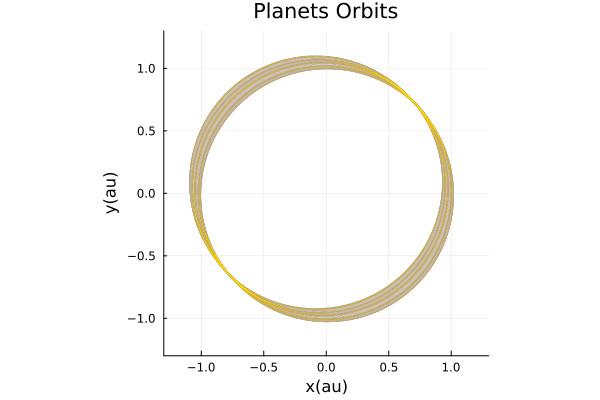

[1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
  0.060885 seconds (37.33 k allocations: 111.261 MiB, 5.70% gc time, 39.36% compilation time)
[1.3267769272608088e8, 5.664394206188868e7, -631194.9710569296]


In [44]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG
using JSON
using HDF5

#=
length:km, mass:kg, time:s, angle:rad(deg in json)
(interval must be a multiple of dt, tEnd must be a multiple of interval)
=#

colors = [:orange, :black, :blue, :red, :brown, :bisque4, :gray, :blue] #惑星の色
AU = 1.495978e8 #AU

function plotWithChunks(file, tEnd, dt, range, title, chunk_size)
    p = scatter([], [], xlims=(-range,range), ylims=(-range,range), title=title, xlabel="x(au)", ylabel="y(au)", aspect_ratio=:equal, legend=false)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[4,1,begin:10:end] ./ AU
        Y = chunk[4,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:blue, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[4,:,end])
    return p 
end

function plotWithChunks(file, tEnd, dt, chunk_size, p)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[3,1,begin:10:end] ./ AU
        Y = chunk[3,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:gold, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[3,:,end])
    return p 
end

function main()
    f = h5open("nothing.h5", "r")
    N = read(f, "/params/n")
    tEnd = read(f, "/params/tend")
    dt = read(f, "/params/dt")
    chunk_size = read(f, "/params/chunksize")

    @time p1 = plotWithChunks(f, tEnd, dt, 1.3, "Planets Orbits", chunk_size)
    f2 = h5open("venus.h5", "r")
    p2 = plotWithChunks(f2, tEnd, dt, chunk_size, p1)

    close(f)
    close(f2)

    display(p2)
end
gr()
main()


In [43]:
p = [1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
q = [1.3267769272608088e8, 5.664394206188868e7, -631194.9710569296]
sqrt(sum((p .- q).^2))

76740.89796297952

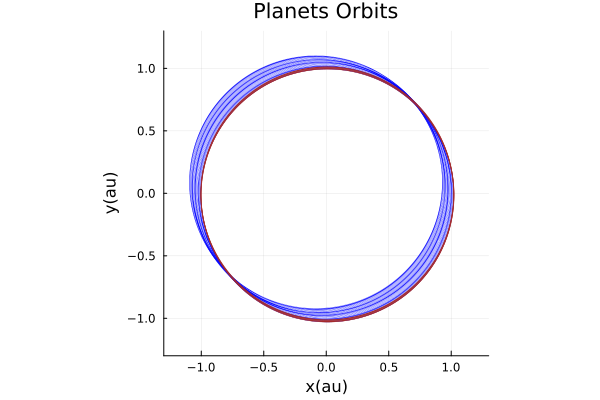

[1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
  0.143490 seconds (37.32 k allocations: 111.261 MiB, 62.42% gc time, 14.20% compilation time)
[1.4640293417747527e8, 4.343690686097164e7, -2.0253146416409628e6]


In [45]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG
using JSON
using HDF5

#=
length:km, mass:kg, time:s, angle:rad(deg in json)
(interval must be a multiple of dt, tEnd must be a multiple of interval)
=#

colors = [:orange, :black, :blue, :red, :brown, :bisque4, :gray, :blue] #惑星の色
AU = 1.495978e8 #AU

function plotWithChunks(file, tEnd, dt, range, title, chunk_size)
    p = scatter([], [], xlims=(-range,range), ylims=(-range,range), title=title, xlabel="x(au)", ylabel="y(au)", aspect_ratio=:equal, legend=false)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[4,1,begin:10:end] ./ AU
        Y = chunk[4,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:blue, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[4,:,end])
    return p 
end

function plotWithChunks(file, tEnd, dt, chunk_size, p)
    Nt = Int(ceil(tEnd/dt))
    for c in 1:Int(Nt/chunk_size)
        chunk = read(file, "/data/$c")
        X = chunk[4,1,begin:10:end] ./ AU
        Y = chunk[4,2,begin:10:end] ./ AU
        plot!(p, X, Y, color=:brown, lw=0.2)
    end
    println(read(file, "/data/$(Int(Nt/chunk_size))")[4,:,end])
    return p 
end

function main()
    f = h5open("nothing.h5", "r")
    N = read(f, "/params/n")
    tEnd = read(f, "/params/tend")
    dt = read(f, "/params/dt")
    chunk_size = read(f, "/params/chunksize")

    @time p1 = plotWithChunks(f, tEnd, dt, 1.3, "Planets Orbits", chunk_size)
    f2 = h5open("jupiter.h5", "r")
    p2 = plotWithChunks(f2, tEnd, dt, chunk_size, p1)

    close(f)
    close(f2)

    display(p2)
end
gr()
main()


In [47]:
p = [1.327100193662189e8, 5.661970641124528e7, -696439.0282226418]
q = [1.4640293417747527e8, 4.343690686097164e7, -2.0253146416409628e6]
sqrt(sum((p .- q).^2))

1.9053819312855814e7